<a href="https://colab.research.google.com/github/potopaa/ml_course_HWs/blob/addition%2Fnew_HW/HW_2_5_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [400]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [401]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [402]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HP_ML_cource/csv/cars.csv')
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [404]:
df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [405]:
unique_counts = {col: df[col].nunique() for col in df.columns if df[col].dtype == 'object'}
unique_values = {col: df[col].unique() for col in df.columns if df[col].dtype == 'object'}

unique_counts, unique_values

({'Brand': 11,
  'Model': 58,
  'Fuel_Type': 2,
  'Transmission': 2,
  'Owner_Type': 3},
 {'Brand': array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
         'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object),
  'Model': array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
         'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
         'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
         'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
         'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
         'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
         'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
         'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
         'Innova Crysta', 'EcoSport'], dtype=object),
  'Fuel_Type': array(['Petrol', 'Diesel'], dtype=object),
  'Transmission': array(['Manual', 'Automatic'], dtype=obj

### HW ВИСНОВОК:
Набір даних містить 13 колонок: 8 числових (Car_ID, Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price) і 5 категоріальних колонок (Brand, Model, Fuel_Type, Transmission, Owner_Type), з яких:
- 2 мультикатегоріальні колонки зі значеннями, для яких немає відношення порядку (Brand (11 унікальних значень) та Model (58 унікальних значень)
- 2 бінарні колонки (Fuel_Type (Petrol, Diesel) та Transmission (Manual, Automatic))
- 1 колонка, в якій можна встановити відношення порядку (Owner_Type (First, Second, Third))

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [406]:
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
len(X_train), len(y_train)

(80, 80)

In [407]:
X_train.index[:20], y_train.index[:20]

(Index([83, 55, 26, 54, 19, 57, 46, 23, 36, 91, 81, 65, 84, 90, 88, 29, 38, 77,
        40, 78],
       dtype='int64'),
 Index([83, 55, 26, 54, 19, 57, 46, 23, 36, 91, 81, 65, 84, 90, 88, 29, 38, 77,
        40, 78],
       dtype='int64'))

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [408]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [409]:
ft_codes = {'Petrol': 1, 'Diesel': 0}
X_train['Fuel_Type'] = X_train['Fuel_Type'].map(ft_codes)
X_test['Fuel_Type'] = X_test['Fuel_Type'].map(ft_codes)

In [410]:
df['Transmission'].value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [411]:
tr_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission'] = X_train['Transmission'].map(tr_codes)
X_test['Transmission'] = X_test['Transmission'].map(tr_codes)

In [412]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [413]:
one_hot_train = enc.transform(X_train[['Brand']]).toarray()
enc.categories_[0]
X_train[enc.categories_[0]] = one_hot_train
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,Volkswagen,T-Roc,2019,22000,1,1,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,Audi,A5,2018,28000,0,1,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,1,1,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,Mercedes,GLC,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [414]:
one_hot_test = enc.transform(X_test[['Brand']]).toarray()
enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [415]:
X_test[enc.categories_[0]] = one_hot_test
X_test.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,1,1,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,1,0,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,1,0,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Значення у колонці Model можна згрупувати за типом кузова моделі автомобіля:

In [416]:
model_mapping = {
    'Corolla': 'Compact',
    'Civic': 'Compact',
    'Mustang': 'Sports',
    'Swift': 'Compact',
    'Sonata': 'Sedan',
    'Nexon': 'SUV',
    'Scorpio': 'SUV',
    'Polo': 'Compact',
    'A4': 'Sedan',
    'X1': 'SUV',
    'C-Class': 'Sedan',
    'Endeavour': 'SUV',
    'Creta': 'SUV',
    'Harrier': 'SUV',
    'Ertiga': 'MPV',
    'City': 'Sedan',
    'Tiguan': 'SUV',
    'Q3': 'SUV',
    '5 Series': 'Sedan',
    'GLC': 'SUV',
    'Innova': 'MPV',
    'Figo': 'Compact',
    'Verna': 'Sedan',
    'Altroz': 'Compact',
    'Thar': 'SUV',
    'Passat': 'Sedan',
    'A6': 'Sedan',
    'X3': 'SUV',
    'E-Class': 'Sedan',
    'Fortuner': 'SUV',
    'Aspire': 'Compact',
    'Elantra': 'Sedan',
    'Safari': 'SUV',
    'Vitara': 'SUV',
    'WR-V': 'Compact',
    'Ameo': 'Compact',
    'A3': 'Compact',
    '7 Series': 'Sedan',
    'GLE': 'SUV',
    'Yaris': 'Sedan',
    'Ranger': 'Pickup',
    'Santro': 'Compact',
    'Tigor': 'Compact',
    'S-Cross': 'SUV',
    'BR-V': 'SUV',
    'T-Roc': 'SUV',
    'Q7': 'SUV',
    'X5': 'SUV',
    'GLA': 'SUV',
    'Camry': 'Sedan',
    'Venue': 'Compact',
    'Tiago': 'Compact',
    'XUV300': 'SUV',
    'Vento': 'Sedan',
    'A5': 'Sedan',
    '3 Series': 'Sedan',
    'Innova Crysta': 'MPV',
    'EcoSport': 'SUV'
}

X_train['Model'] = X_train['Model'].map(model_mapping)
X_test['Model'] = X_test['Model'].map(model_mapping)

In [417]:
enc.fit(X_train[['Model']])
one_hot_train = enc.transform(X_train[['Model']]).toarray()
enc.categories_[0]
X_train[enc.categories_[0]] = one_hot_train
one_hot_test = enc.transform(X_test[['Model']]).toarray()
X_test[enc.categories_[0]] = one_hot_test

X_train.columns, X_test.columns

(Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
        'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
        'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Compact', 'MPV', 'Pickup',
        'SUV', 'Sedan', 'Sports'],
       dtype='object'),
 Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
        'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
        'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Compact', 'MPV', 'Pickup',
        'SUV', 'Sedan', 'Sports'],
       dtype='object'))

In [418]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Compact,MPV,Pickup,SUV,Sedan,Sports,Owner_Type_Codes
83,84,Volkswagen,SUV,2019,22000,1,1,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
55,56,Audi,Sedan,2018,28000,0,1,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,27,Audi,Sedan,2018,28000,1,1,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
54,55,Volkswagen,Sedan,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19,20,Mercedes,SUV,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Очікуваний результат після трансформацій:

In [419]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Compact,MPV,Pickup,SUV,Sedan,Sports,Owner_Type_Codes
83,84,Volkswagen,SUV,2019,22000,1,1,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
55,56,Audi,Sedan,2018,28000,0,1,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,27,Audi,Sedan,2018,28000,1,1,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
54,55,Volkswagen,Sedan,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19,20,Mercedes,SUV,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Compact,MPV,Pickup,SUV,Sedan,Sports,Owner_Type_Codes
17,18,Audi,SUV,2016,38000,1,1,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
41,42,Hyundai,Compact,2019,26000,1,0,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Sedan,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
14,15,Maruti,MPV,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Compact,2019,26000,1,0,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [420]:
X_train_numeric = X_train.select_dtypes(include='number')
X_plus_y = pd.concat([X_train_numeric, y_train], axis=1)
correlation_matrix = X_plus_y.corr()
high_correlation_columns = correlation_matrix[abs(correlation_matrix['Price']) > 0.5]['Price']
print("Колонки з кореляцією більше 0.5 за модулем з цільовою змінною:", high_correlation_columns)

Колонки з кореляцією більше 0.5 за модулем з цільовою змінною: Transmission    0.680731
Mileage        -0.638404
Engine          0.710561
Power           0.849137
Compact        -0.500603
Price           1.000000
Name: Price, dtype: float64


### HW

Колонки з кореляцією більше 0.5 за модулем з цільовою змінною:
1. з позитивною кореляцією:
  - Transmission    0.680731
  - Engine          0.710561
  - Power           0.849137

2. з негативною кореляцією:
  - Mileage        -0.638404
  - Compact        -0.500603

In [421]:
corr_probig = correlation_matrix['Kilometers_Driven']['Price']
corr_probig

-0.08395075547802626

Як це не дивно, але дуже низька кореляція ціни і пробігу автомобіля, хоча і очікувано негативна.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [422]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train_numeric, y_train)

X_test_numeric = X_test[X_train_numeric.columns]

In [423]:
y_train_pred = lr_model.predict(X_train_numeric)
y_test_pred = lr_model.predict(X_test.select_dtypes(include='number'))

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE_train:", rmse_train)
print("RMSE_test:", rmse_test)

RMSE_train: 186643.48179113198
RMSE_test: 297093.2119389293


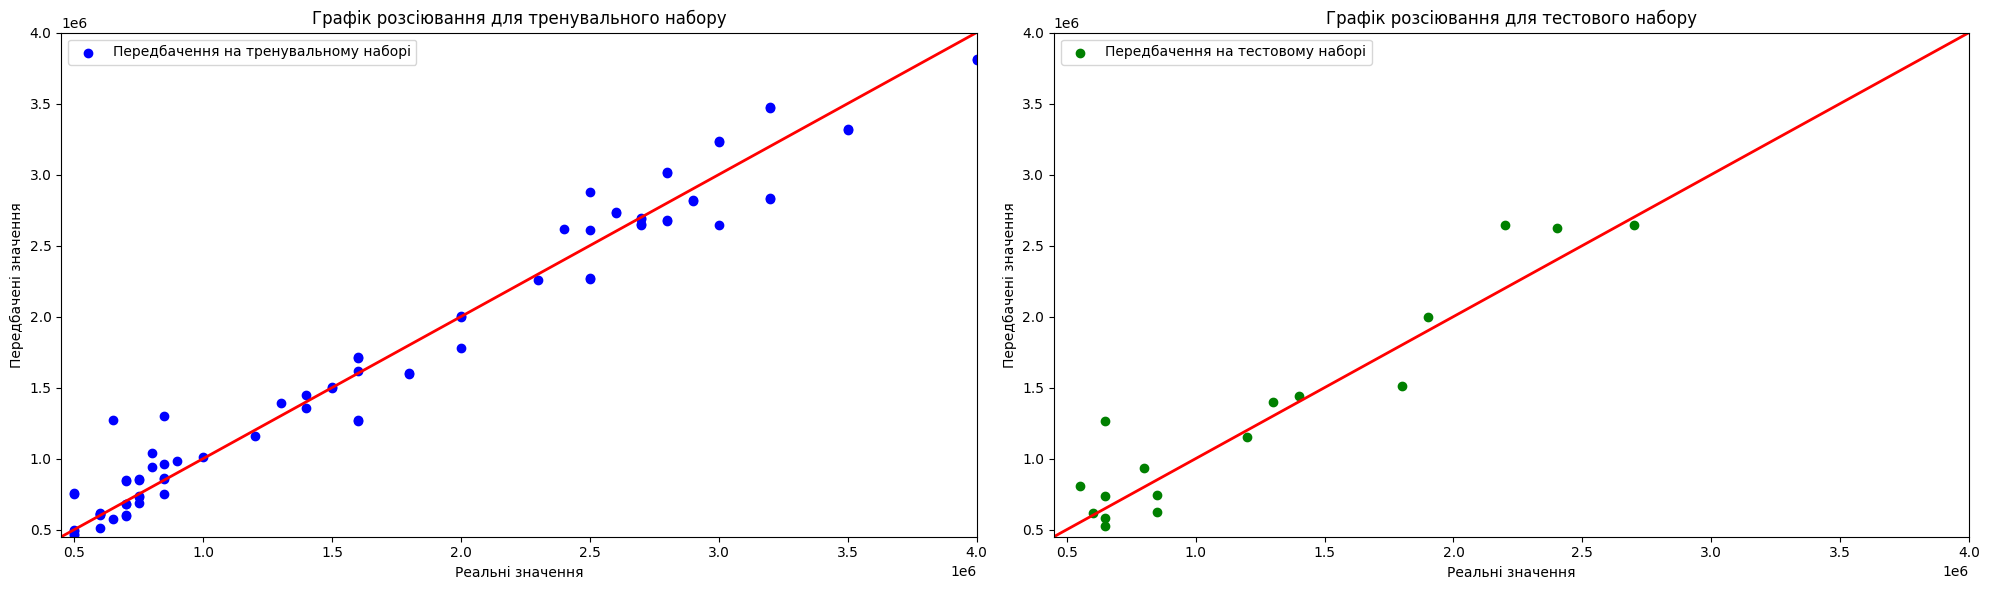

In [424]:
common_min = min(y_train.min(), y_test.min())
common_max = max(y_train.max(), y_test.max())

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axes[0].scatter(y_train, y_train_pred, color='blue', label='Передбачення на тренувальному наборі')
axes[0].plot([common_min, common_max], [common_min, common_max], color='red', linestyle='-', linewidth=2)
axes[0].set_xlabel('Реальні значення')
axes[0].set_ylabel('Передбачені значення')
axes[0].set_title('Графік розсіювання для тренувального набору')
axes[0].legend()
axes[0].set_xlim(common_min, common_max)
axes[0].set_ylim(common_min, common_max)

axes[1].scatter(y_test, y_test_pred, color='green', label='Передбачення на тестовому наборі')
axes[1].plot([common_min, common_max], [common_min, common_max], color='red', linestyle='-', linewidth=2)
axes[1].set_xlabel('Реальні значення')
axes[1].set_ylabel('Передбачені значення')
axes[1].set_title('Графік розсіювання для тестового набору')
axes[1].legend()
axes[1].set_xlim(common_min, common_max)
axes[1].set_ylim(common_min, common_max)

plt.tight_layout()
plt.show()

### ВИСНОВКИ:

1. RMSE низький на тренувальному наборі, але великий на тестовому наборі. Це може свідчити про перенавчання моделі.
2. Наявні точки розсіювання для тестового набору, які розташовані далеко від лінії. Це може вказувати на недоліки моделі.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [425]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train_numeric)

In [426]:
scaler.mean_, scaler.var_

(array([5.3162500e+01, 2.0183625e+03, 2.8362500e+04, 5.1250000e-01,
        6.1250000e-01, 1.7062500e+01, 1.9107375e+03, 1.6688750e+02,
        5.2250000e+00, 1.0000000e-01, 1.1250000e-01, 1.1250000e-01,
        6.2500000e-02, 7.5000000e-02, 5.0000000e-02, 6.2500000e-02,
        1.1250000e-01, 1.2500000e-01, 1.0000000e-01, 8.7500000e-02,
        2.3750000e-01, 2.5000000e-02, 2.5000000e-02, 3.7500000e-01,
        3.0000000e-01, 3.7500000e-02, 6.5000000e-01]),
 array([7.99036094e+02, 1.25609375e+00, 8.40810938e+07, 2.49843750e-01,
        2.37343750e-01, 1.16335937e+01, 4.31270294e+05, 6.62974984e+03,
        5.49375000e-01, 9.00000000e-02, 9.98437500e-02, 9.98437500e-02,
        5.85937500e-02, 6.93750000e-02, 4.75000000e-02, 5.85937500e-02,
        9.98437500e-02, 1.09375000e-01, 9.00000000e-02, 7.98437500e-02,
        1.81093750e-01, 2.43750000e-02, 2.43750000e-02, 2.34375000e-01,
        2.10000000e-01, 3.60937500e-02, 4.27500000e-01]))

In [427]:
X_train_scaled = scaler.transform(X_train_numeric)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns)

In [428]:
X_test_scaled = scaler.transform(X_test_numeric)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns)

In [429]:
def train_model_show_rmse(inputs, targets):
  lr_model = LinearRegression().fit(inputs, targets)
  predictions = lr_model.predict(inputs)
  loss = mean_squared_error(targets, predictions, squared=False)
  print('Loss:', loss)
  return model

In [430]:
inputs, targets = X_train_scaled_df, y_train
train_model_show_rmse(inputs, targets)

Loss: 186643.48179113198


In [431]:
coefficients = lr_model.coef_
features = X_train_numeric.columns
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)
coeff_df

,Feature,Coefficient
9,Audi,668974.967484
16,Mercedes,607000.018142
10,BMW,563372.313993
20,Compact,253149.097748
18,Toyota,250263.769586
23,SUV,240712.591182
24,Sedan,215563.077680
4,Transmission,175384.782624
22,Pickup,149030.531712
1,Year,21831.367703


### HW

Позитивний вплив:
Audi (668974.967484) Логічно: Audi є преміум-брендом.
Mercedes (607000.018142) Логічно: Mercedes є преміум-брендом.
BMW (563372.313993) Логічно: BMW є престижним брендом.
Compact (253149.097748) Логічно: Компактні автомобілі можуть бути дорогими через їх популярність у міських умовах.
Toyota (250263.769586) kогічно: Toyota має репутацію надійних автомобілів, що може підвищити їхню ціну.
SUV (240712.591182) Логічно: позашляховики зазвичай дорожчі через їх розмір, потужність та популярність.
Sedan (215563.077680) Логічно: Седани є популярними автомобілями, особливо в бізнес-класі, що може пояснювати їх високу ціну.
Transmission (175384.782624) Логічно: Автоматична трансмісія зазвичай дорожче.
Pickup (149030.531712) Логічно: Пікапи можуть бути дорогими через їх потужність і користь у господарстві.
Year (21831.367703) Логічно: Новіші автомобілі зазвичай дорожчі.
Power (7797.812017) Логічно: Більша потужність двигуна робить автомобіль дорожчим.


Негативний вплив:
Kilometers_Driven (-9.419194) Логічно: Збільшення пробігу знижує ціну автомобіля через знос.
Engine (-35.650036) Менша потужність двигуна або його старість може знижувати ціну.
Seats (-2661.210815) Більше сидінь може означати нелюксову модель, але вплив незначний.
Owner_Type_Codes (-14036.983150) Логічно: Більше власників може означати більший знос і меншу вартість.
Mileage (-34857.397370) Логічно: Менша паливна ефективність знижує ціну автомобіля.
Ford (-131085.752974) Логічно: Можливо, Ford не є преміальною моделлю авто.
Volkswagen (-171930.479947) Логічно: VW не є преміальною моделлю авто.
Tata (-194343.320447) Tata - виробник бюджетних автомобілів.
Honda (-232418.916968) Логічно: Honda не є преміальною моделлю авто.
Maruti (-333853.014693) Maruti - виробник бюджетних автомобілів.
MPV (-334892.712753) Логічно: MPV можуть бути менш популярними, що знижує їх ціну.
Fuel_Type (-389099.960001) Логічно: Тип палива може впливати на вартість, наприклад, дизельні автомобілі можуть бути дешевшими через екологічні вимоги.
Hyundai (-413768.892186) Логічно: Hyundai не є преміальною моделлю авто.
Sports (-523562.585569) Логічно: Спортивні автомобілі можуть мати високу вартість обслуговування.
Mahindra (-612210.691990) Логічно: Mahindra - виробник бюджетних автомобілів.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [432]:
import statsmodels.api as sm
X_train_scaled_with_const = sm.add_constant(X_train_scaled_df)
X_train_scaled_with_const.columns = ['const'] + list(X_train_scaled_df.columns)
model = sm.OLS(y_train.values, X_train_scaled_with_const)
results = model.fit()
round(results.params)

const                1680000.0
Car_ID                  5087.0
Year                   24468.0
Kilometers_Driven     -86370.0
Fuel_Type            -194489.0
Transmission           85444.0
Mileage              -118892.0
Engine                -23412.0
Power                 634923.0
Seats                  -1972.0
Audi                  180572.0
BMW                   156823.0
Ford                  -62612.0
Honda                 -72494.0
Hyundai              -126648.0
Mahindra             -148045.0
Maruti                -97047.0
Mercedes              170608.0
Tata                  -86453.0
Toyota                 54959.0
Volkswagen            -67533.0
Compact                33378.0
MPV                   -79562.0
Pickup                 -4010.0
SUV                    31952.0
Sedan                  18720.0
Sports               -132661.0
Owner_Type_Codes       -9178.0
dtype: float64

In [433]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     64.12
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           1.08e-31
Time:                        18:31:58   Log-Likelihood:                -1084.5
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      54   BIC:                             2283.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.54e+04     66.144      0.000    1.63e+06    1.73e+06
Car_ID             5086.8655   3.22e+04      0.158      0.875   -5.94e+04    6.96e+04
Year               2.447e+04   6.33e+04      0.387      0.700   -1.02e+05    1.51e+05
Kilometers_Driven -8.637e+04   6.59e+04     -1.311      0.195   -2.18e+05    4.57e+04
Fuel_Type         -1.945e+05    4.5e+04     -4.322      0.000   -2.85e+05   -1.04e+05
Transmission       8.544e+04   4.58e+04      1.867      0.067   -6290.092    1.77e+05
Mileage           -1.189e+05   6.16e+04     -1.930      0.059   -2.42e+05    4629.429
Engine            -2.341e+04   7.17e+04     -0.326      0.745   -1.67e+05     1.2e+05
Power              6.349e+05   9.33e+04      6.802      0.000    4.48e+05    8.22e+05
Seats             -1972.4851   4.66e+04     -0.042      0.966   -9.53e+04    9.14e+04
Audi               1.806e+05   3.63e+04      4.971      0.000    1.08e+05    2.53e+05
BMW                1.568e+05   3.64e+04      4.306      0.000    8.38e+04     2.3e+05
Ford              -6.261e+04   4.48e+04     -1.398      0.168   -1.52e+05    2.72e+04
Honda             -7.249e+04   3.49e+04     -2.080      0.042   -1.42e+05   -2607.136
Hyundai           -1.266e+05   3.13e+04     -4.046      0.000   -1.89e+05   -6.39e+04
Mahindra           -1.48e+05    3.2e+04     -4.624      0.000   -2.12e+05   -8.39e+04
Maruti            -9.705e+04   3.24e+04     -2.996      0.004   -1.62e+05   -3.21e+04
Mercedes           1.706e+05   3.71e+04      4.602      0.000    9.63e+04    2.45e+05
Tata              -8.645e+04   4.08e+04     -2.117      0.039   -1.68e+05   -4571.090
Toyota             5.496e+04    3.5e+04      1.570      0.122   -1.52e+04    1.25e+05
Volkswagen        -6.753e+04   2.94e+04     -2.297      0.026   -1.26e+05   -8588.547
Compact            3.338e+04   4.05e+04      0.824      0.414   -4.79e+04    1.15e+05
MPV               -7.956e+04    3.3e+04     -2.408      0.019   -1.46e+05   -1.33e+04
Pickup            -4009.7672   3.61e+04     -0.111      0.912   -7.63e+04    6.83e+04
SUV                3.195e+04   2.41e+04      1.324      0.191   -1.64e+04    8.03e+04
Sedan              1.872e+04   2.78e+04      0.674      0.503   -3.69e+04    7.44e+04
Sports            -1.327e+05   6.29e+04     -2.108      0.040   -2.59e+05   -6489.098
Owner_Type_Codes  -9177.8687   5.86e+04     -0.157      0.876   -1.27e+05    1.08e+05
==============================================================================
Omnibus:                        4.256   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.610
Skew:                          -0.369   Prob(JB):                        0.165
Kurtosis:                       3.734   Cond. No.                     1.19e+16
======================

### HW

Змінні з p-value менше 0.05:
1. Fuel_Type - 0.000
2. Audi - 0.000
3. BMW - 0.000
4. Honda - 0.042
5. Hyundai - 0.000
6. Mahindra - 0.000
7. Maruti - 0.004
8. Mercedes - 0.000
9. Tata - 0.039
10. Volkswagen - 0.026
11. MPV - 0.019
12. Sports - 0.040
13. Power - 0.000


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [434]:
significant_features = ['Fuel_Type', 'Audi', 'BMW', 'Honda', 'Hyundai', 'Mahindra',
                        'Maruti', 'Mercedes', 'Tata', 'Volkswagen', 'MPV', 'Sports', 'Power']

X_train_significant = X_train[significant_features]
X_test_significant = X_test[significant_features]

X_train_significant_with_const = sm.add_constant(X_train_significant)
model_significant = sm.OLS(y_train, X_train_significant_with_const).fit()

summary_significant = model_significant.summary()
summary_significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     98.07
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           6.89e-38
Time:                        18:31:58   Log-Likelihood:                -1101.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      66   BIC:                             2263.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.863e+05   1.28e+05      3.019      0.004    1.31e+05    6.42e+05
Fuel_Type  -3.011e+05   6.26e+04     -4.808      0.000   -4.26e+05   -1.76e+05
Audi        7.234e+05   1.23e+05      5.872      0.000    4.77e+05    9.69e+05
BMW         6.759e+05   1.35e+05      5.003      0.000    4.06e+05    9.46e+05
Honda      -3.885e+05   1.39e+05     -2.799      0.007   -6.66e+05   -1.11e+05
Hyundai    -5.116e+05   1.28e+05     -4.009      0.000   -7.66e+05   -2.57e+05
Mahindra   -5.715e+05   1.51e+05     -3.792      0.000   -8.72e+05   -2.71e+05
Maruti     -2.898e+05   1.39e+05     -2.084      0.041   -5.67e+05   -1.21e+04
Mercedes    7.207e+05   1.27e+05      5.655      0.000    4.66e+05    9.75e+05
Tata       -2.969e+05   1.13e+05     -2.636      0.010   -5.22e+05   -7.21e+04
Volkswagen -1.056e+05   1.21e+05     -0.874      0.385   -3.47e+05    1.36e+05
MPV        -4.367e+05   1.97e+05     -2.212      0.030   -8.31e+05   -4.26e+04
Sports     -8.078e+05    2.4e+05     -3.362      0.001   -1.29e+06   -3.28e+05
Power       8481.7789    697.416     12.162      0.000    7089.344    9874.214
==============================================================================
Omnibus:                        2.593   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.946
Skew:                           0.223   Prob(JB):                        0.378
Kurtosis:                       3.621   Cond. No.                     1.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Попередні значення:
R-squared:	0.967
Adj. R-squared:	0.952

Поточні значення:
R-squared:	0.951
Adj. R-squared:	0.941

Значення R-squared та Adj. R-squared зменьшилися, що говорить про покращення точності моделі.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [435]:
significant_features_p25 = [
    'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Mileage', 'Power',
    'Audi', 'BMW', 'Honda', 'Ford', 'Toyota', 'SUV',
    'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Volkswagen',
    'MPV', 'Sports'
]

X_train_significant_p25 = X_train[significant_features_p25]
X_test_significant_p25 = X_test[significant_features_p25]

X_train_significant_p25_with_const = sm.add_constant(X_train_significant_p25)
X_test_significant_p25_with_const = sm.add_constant(X_test_significant_p25)

model_significant_p25 = sm.OLS(y_train, X_train_significant_p25_with_const).fit()

model_significant_p25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     98.96
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           3.06e-38
Time:                        18:31:58   Log-Likelihood:                -1085.1
No. Observations:                  80   AIC:                             2208.
Df Residuals:                      61   BIC:                             2253.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.243e+06      3e+05      4.144      0.000    6.43e+05    1.84e+06
Kilometers_Driven   -11.1337      3.603     -3.090      0.003     -18.339      -3.929
Fuel_Type         -3.636e+05   5.88e+04     -6.184      0.000   -4.81e+05   -2.46e+05
Transmission       1.747e+05   8.29e+04      2.106      0.039    8839.588    3.41e+05
Mileage           -3.221e+04   1.29e+04     -2.494      0.015    -5.8e+04   -6386.278
Power              7352.0434    773.479      9.505      0.000    5805.376    8898.711
Audi               7.954e+05   9.31e+04      8.545      0.000    6.09e+05    9.81e+05
BMW                 7.03e+05   1.14e+05      6.190      0.000    4.76e+05     9.3e+05
Honda             -1.133e+05   1.18e+05     -0.962      0.340   -3.49e+05    1.22e+05
Ford              -6.295e+04    9.2e+04     -0.684      0.496   -2.47e+05    1.21e+05
Toyota             3.454e+05   9.44e+04      3.657      0.001    1.57e+05    5.34e+05
SUV                1.561e+04   6.46e+04      0.242      0.810   -1.13e+05    1.45e+05
Hyundai           -3.158e+05   1.01e+05     -3.125      0.003   -5.18e+05   -1.14e+05
Mahindra           -4.85e+05   1.17e+05     -4.153      0.000   -7.19e+05   -2.52e+05
Maruti            -2.297e+05   1.06e+05     -2.163      0.034   -4.42e+05   -1.73e+04
Mercedes           7.364e+05    9.7e+04      7.593      0.000    5.42e+05     9.3e+05
Tata              -5.249e+04   8.92e+04     -0.588      0.559   -2.31e+05    1.26e+05
Volkswagen        -7.755e+04   8.89e+04     -0.873      0.386   -2.55e+05       1e+05
MPV               -5.372e+05   1.97e+05     -2.733      0.008    -9.3e+05   -1.44e+05
Sports             -6.43e+05   2.56e+05     -2.515      0.015   -1.15e+06   -1.32e+05
==============================================================================
Omnibus:                        2.633   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.916
Skew:                          -0.278   Prob(JB):                        0.384
Kurtosis:                       3.515   Cond. No.                     5.50e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.35e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### HW ВИСНОВКИ:

- Завдання 8: R-squared: 0.967 Adj. R-squared: 0.952
- Завдання 9: R-squared: 0.951 Adj. R-squared: 0.941
- Завдання 10: R-squared: 0.967 Adj. R-squared: 0.957

Найркащі показники R-squared та Adj. R-squared у моделі із Завдання 9 (залишив би до використання).